<a href="https://colab.research.google.com/github/gekaluck/bdml_wow_project/blob/main/WOW_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_ = "/content/drive/My Drive/Colab Notebooks/Big Data ML/SeoulBikeData.csv"
df = pd.read_csv(file_, encoding = 'unicode_escape') # read in csv file

Mounted at /content/drive


# Data overview

In [2]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# N/A values

In [6]:
print('N/A values')
df.isna().sum().T

N/A values


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Correlations

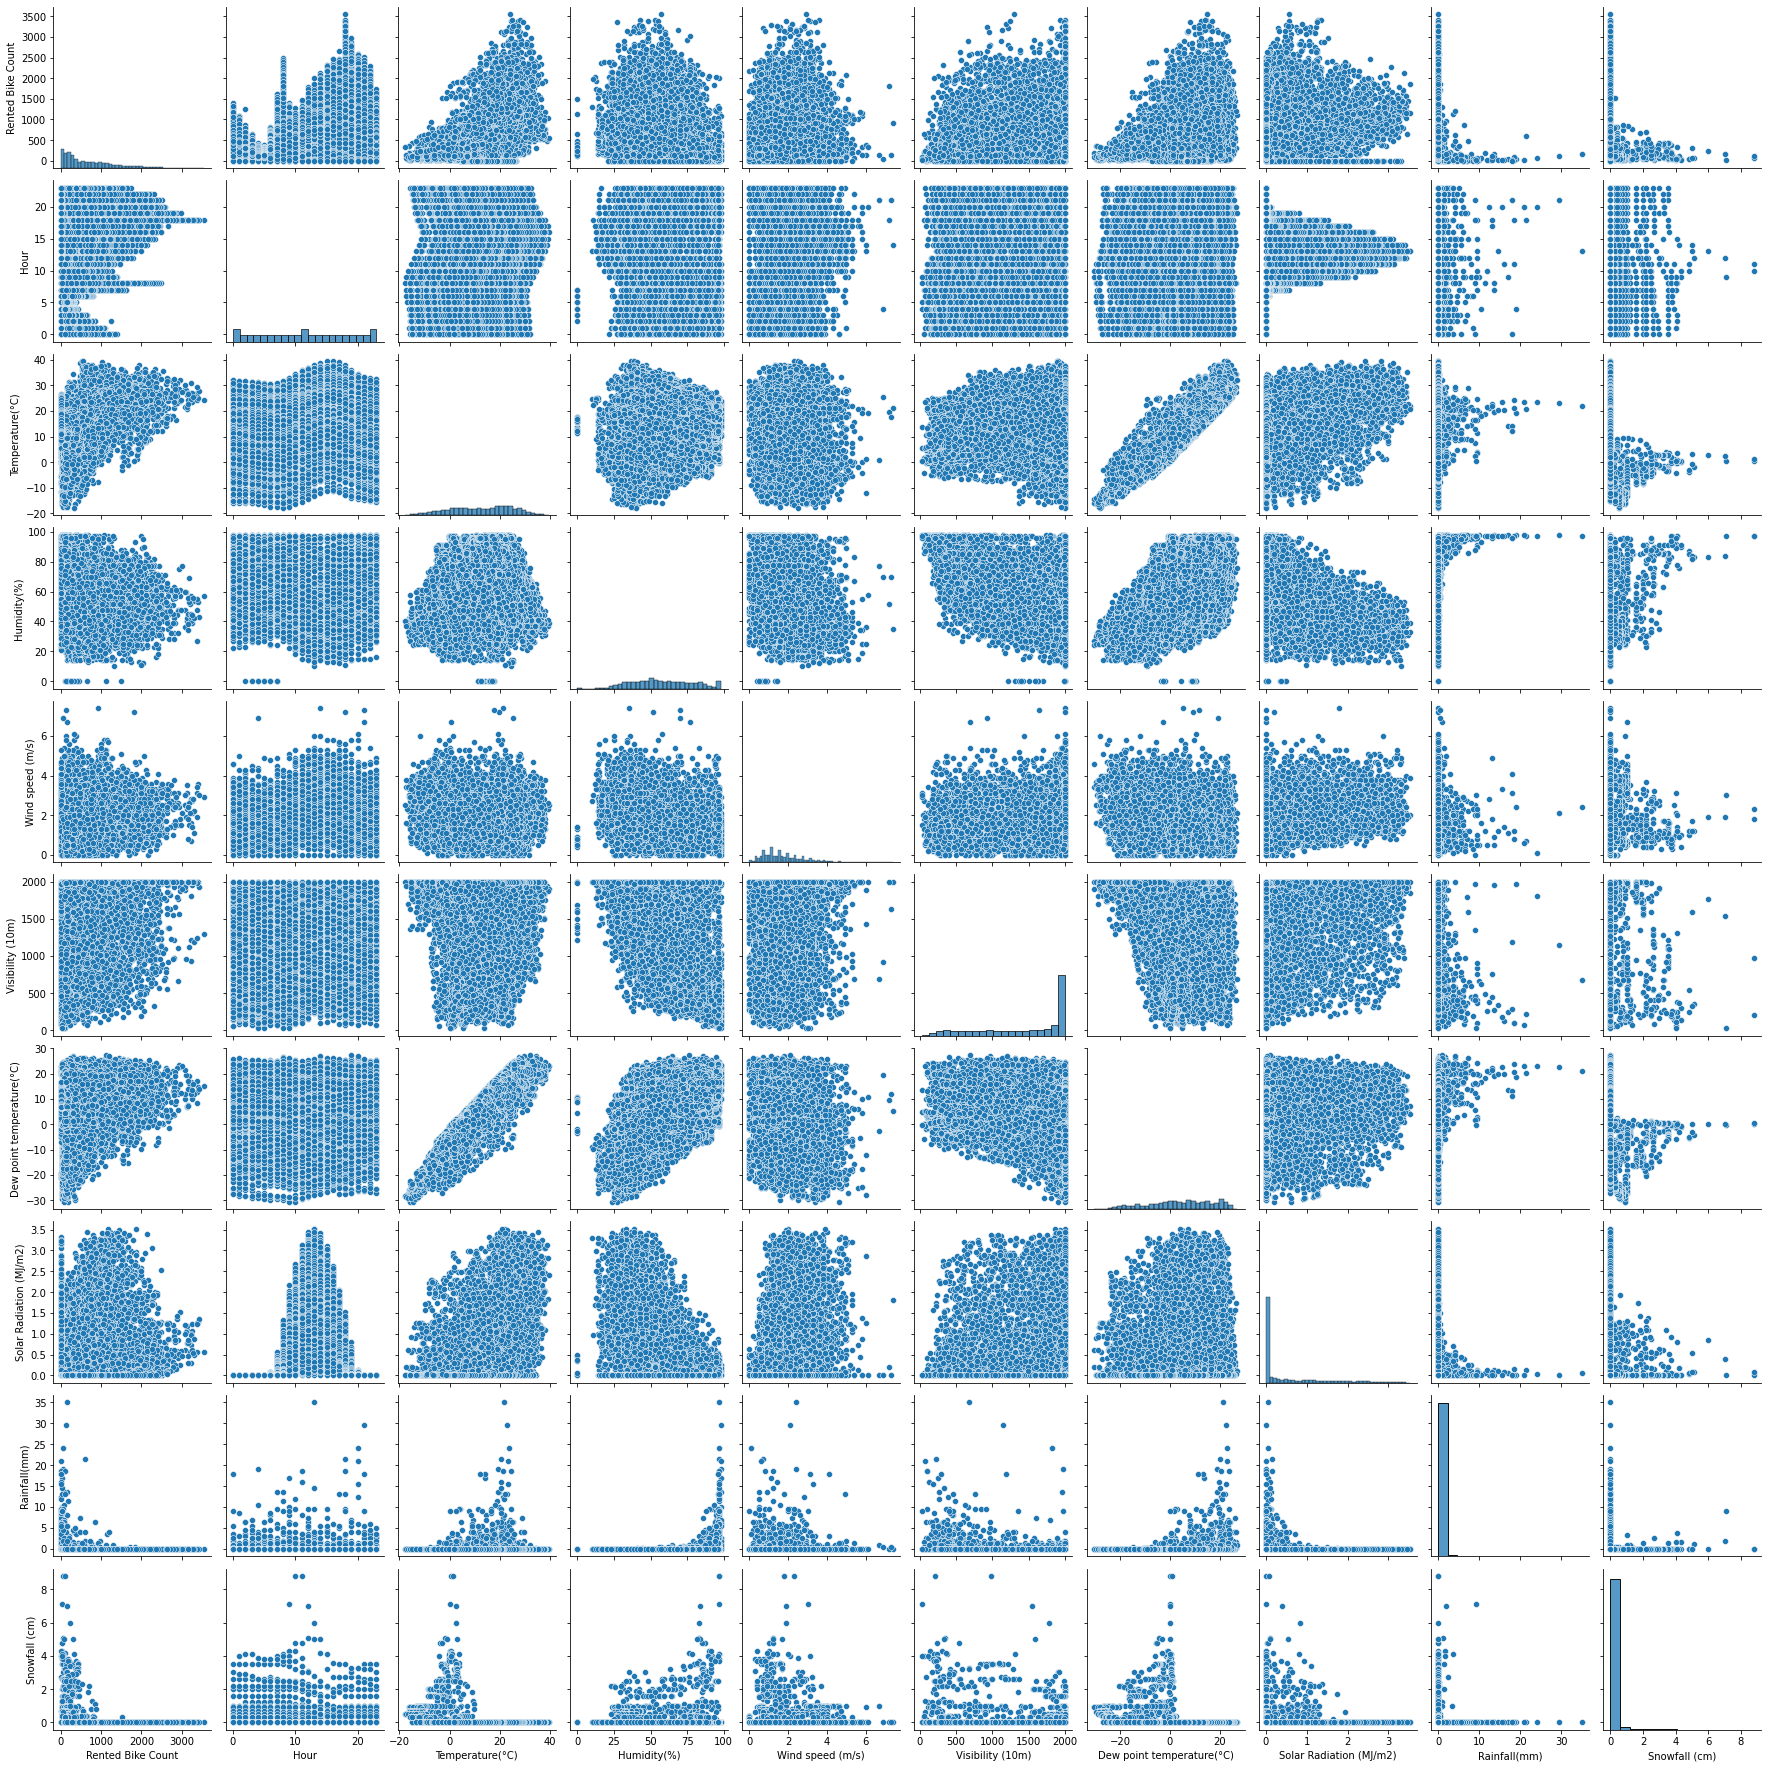

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


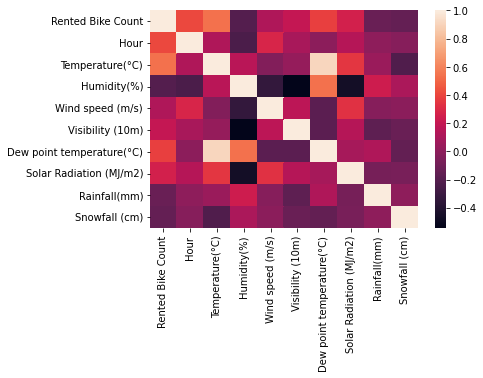

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

*Strong correlation can be seen between target variable and such features as temperature and hour of the day. Also, less significant, but still worth mentioning correlation between target variable and solar radiation. On top of that, correlation between some weather features can bee seen that make sense like humidity and visibility (negative) and dew point temperature and humidity, solar radiation and humidity (negative)*

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [11]:
df.tail(100)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8660,2018-11-26,943,20,7.3,66,0.5,516,1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8661,2018-11-26,955,21,6.7,71,0.9,461,1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8662,2018-11-26,846,22,6.2,70,0.4,474,1.1,0.0,0.0,0.0,Autumn,No Holiday,Yes
8663,2018-11-26,563,23,5.4,78,1.5,404,1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8664,2018-11-27,496,0,4.9,79,0.5,391,1.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [12]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Bike count throughout the year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Date
2017-12-01     9539
2017-12-02     8523
2017-12-03     7222
2017-12-04     8729
2017-12-05     8307
              ...  
2018-11-26    17162
2018-11-27    16282
2018-11-28    16524
2018-11-29    16423
2018-11-30    16297
Name: Rented Bike Count, Length: 365, dtype: int64


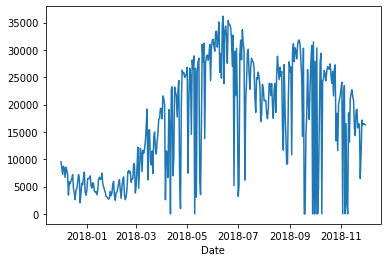

In [13]:
agg = df.groupby('Date').sum()['Rented Bike Count']
sns.lineplot(agg.index, agg.values)
print(agg)

# Bike count distribution throughout the day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


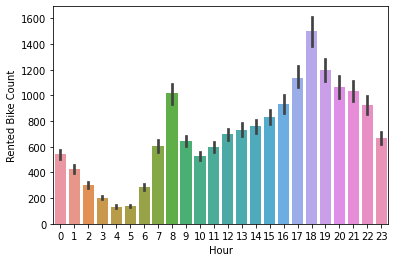

In [14]:
sns.barplot(df['Hour'], df['Rented Bike Count'])

# Bike count during seasons

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


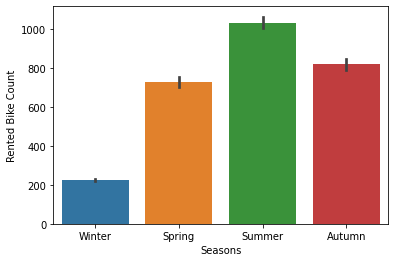

In [15]:
sns.barplot(df['Seasons'], df['Rented Bike Count'])

# Temperature throughout the year 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


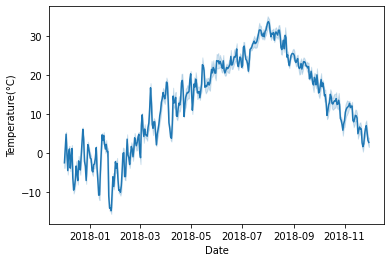

In [16]:
sns.lineplot(df['Date'], df['Temperature(°C)'])

In [17]:
df.loc[df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


Feature engineering and transformations

Datetime

In [18]:
df['DoW'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
print(pd.get_dummies(df).columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'DoW_Friday', 'DoW_Monday', 'DoW_Saturday',
       'DoW_Sunday', 'DoW_Thursday', 'DoW_Tuesday', 'DoW_Wednesday'],
      dtype='object')


In [19]:
mon_dict = {
    1.: 'Jan',
    2.: 'Feb',
    3.: 'Mar',
    4.: 'Apr',
    5.: 'May',
    6.: 'Jun',
    7.: 'Jul',
    8.: 'Aug',
    9.: 'Sep',
    10.: 'Oct',
    11.: 'Nov',
    12.: 'Dec'
    }
df['Month'] = df['Month'].map(mon_dict)
df = pd.get_dummies(df)

In [20]:
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'DoW_Friday', 'DoW_Monday', 'DoW_Saturday',
       'DoW_Sunday', 'DoW_Thursday', 'DoW_Tuesday', 'DoW_Wednesday',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep'],
      dtype='object')


In [21]:
df_new = df.drop(['Rented Bike Count'], axis=1)
df_new['Rented Bike Count'] = df['Rented Bike Count']

df = df_new

print(df.head(100))

         Date  Hour  Temperature(°C)  ...  Month_Oct  Month_Sep  Rented Bike Count
0  2017-12-01     0             -5.2  ...          0          0                254
1  2017-12-01     1             -5.5  ...          0          0                204
2  2017-12-01     2             -6.0  ...          0          0                173
3  2017-12-01     3             -6.2  ...          0          0                107
4  2017-12-01     4             -6.0  ...          0          0                 78
..        ...   ...              ...  ...        ...        ...                ...
95 2017-12-04    23             -5.8  ...          0          0                248
96 2017-12-05     0             -6.1  ...          0          0                216
97 2017-12-05     1             -6.5  ...          0          0                198
98 2017-12-05     2             -6.8  ...          0          0                124
99 2017-12-05     3             -6.9  ...          0          0                 62

[10

Split

In [22]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:,-1]

print(X)
print(y)
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2, 
                     random_state=42)
    
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

           Date  Hour  Temperature(°C)  ...  Month_Nov  Month_Oct  Month_Sep
0    2017-12-01     0             -5.2  ...          0          0          0
1    2017-12-01     1             -5.5  ...          0          0          0
2    2017-12-01     2             -6.0  ...          0          0          0
3    2017-12-01     3             -6.2  ...          0          0          0
4    2017-12-01     4             -6.0  ...          0          0          0
...         ...   ...              ...  ...        ...        ...        ...
8755 2018-11-30    19              4.2  ...          1          0          0
8756 2018-11-30    20              3.4  ...          1          0          0
8757 2018-11-30    21              2.6  ...          1          0          0
8758 2018-11-30    22              2.1  ...          1          0          0
8759 2018-11-30    23              1.9  ...          1          0          0

[8760 rows x 37 columns]
0        254
1        204
2        173
3        10

# Skewness

In [23]:
print(df.skew(axis = 0, skipna = True))

Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
Holiday_Holiday               4.163603
Holiday_No Holiday           -4.163603
Functioning Day_No            5.170969
Functioning Day_Yes          -5.170969
DoW_Friday                    2.014461
DoW_Monday                    2.046167
DoW_Saturday                  2.046167
DoW_Sunday                    2.046167
DoW_Thursday                  2.046167
DoW_Tuesday                   2.046167
DoW_Wednesday                 2.046167
Month_Apr                     3.042925
Month_Aug                

In [24]:
import seaborn as sns
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF

In [25]:
X_train.iloc[:,:10].columns

Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Hour' . Skewness = -0.00


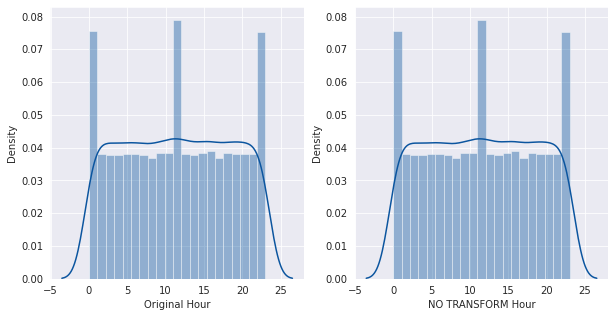

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Temperature(°C)' . Skewness = -0.20


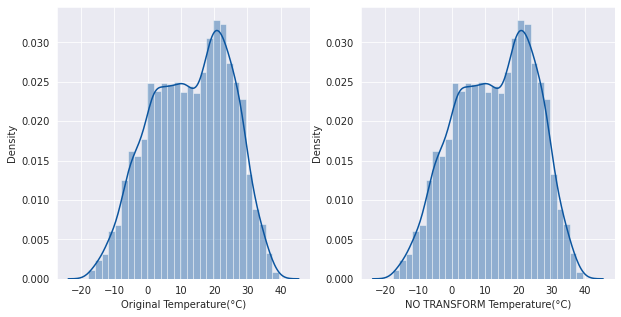

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Humidity(%)' . Skewness = 0.06


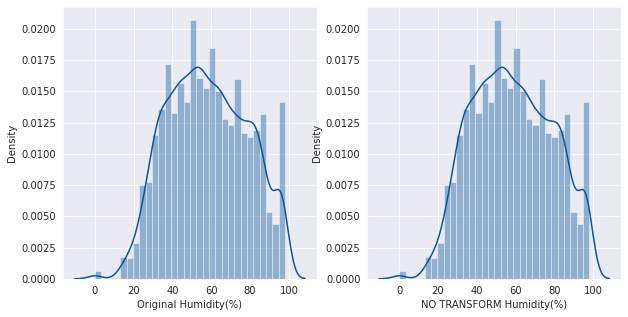

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Wind speed (m/s)' . Skewness = 0.88


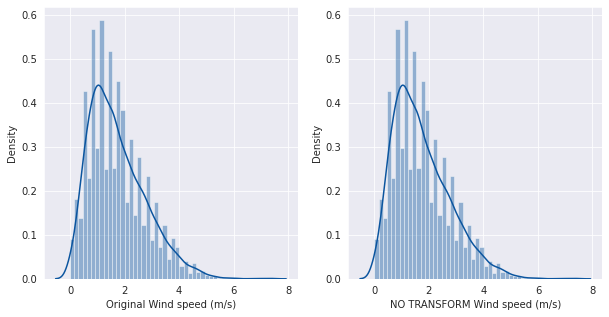

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Visibility (10m)' . Skewness = -0.71


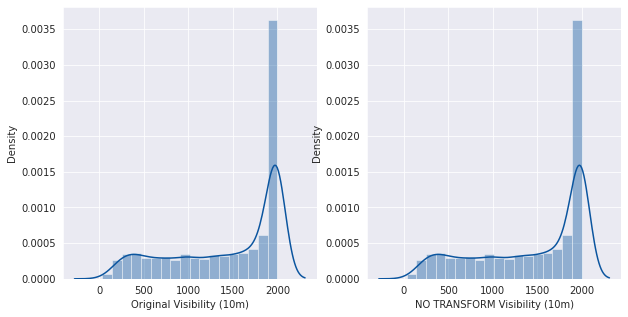

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Dew point temperature(°C)' . Skewness = -0.37


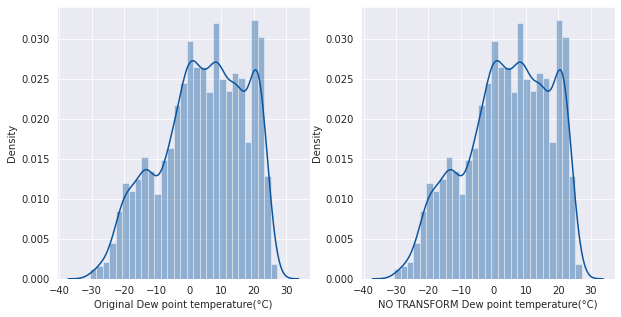

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Solar Radiation (MJ/m2)' had 'positive' skewness of 1.48

 Transformation yielded skewness of 0.22


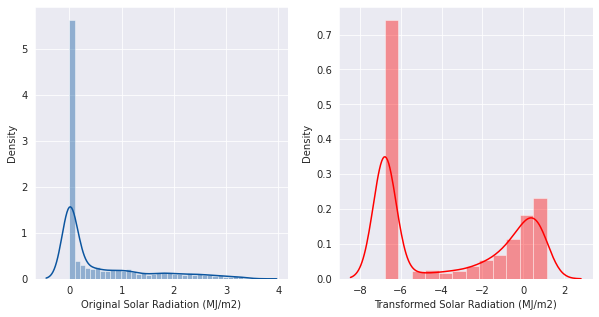

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Rainfall(mm)' had 'positive' skewness of 14.84

 Transformation yielded skewness of 3.67


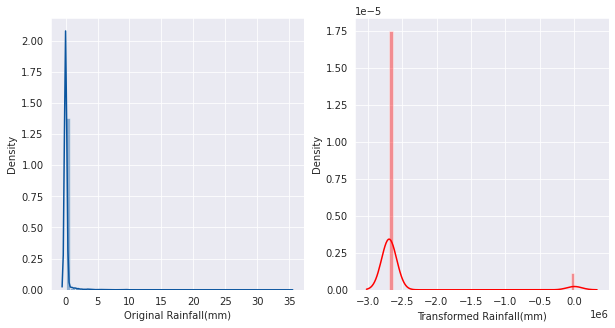

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Snowfall (cm)' had 'positive' skewness of 8.58

 Transformation yielded skewness of 4.08


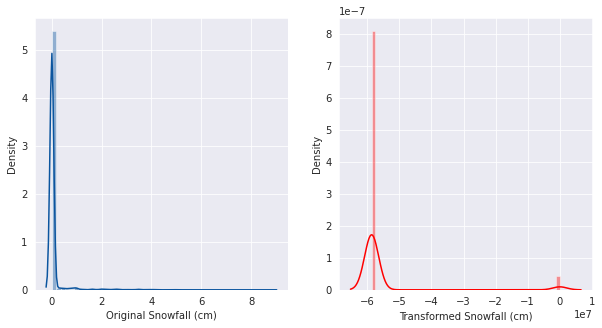

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Hour' . Skewness = 0.01


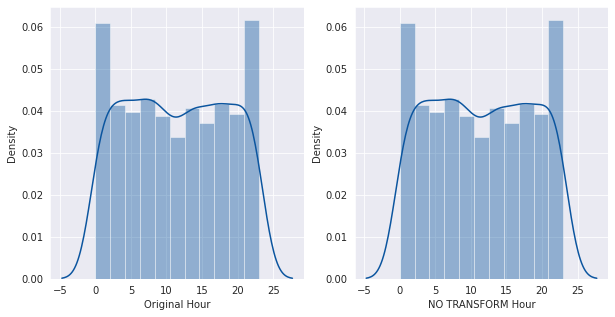

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Temperature(°C)' . Skewness = -0.20


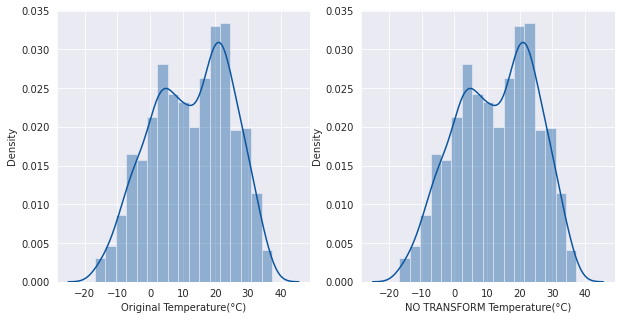

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Humidity(%)' . Skewness = 0.05


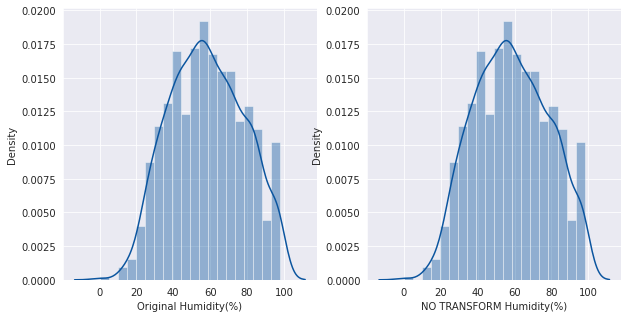

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Wind speed (m/s)' . Skewness = 0.92


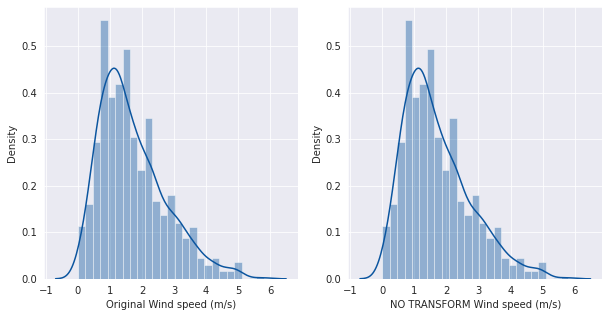

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Visibility (10m)' . Skewness = -0.66


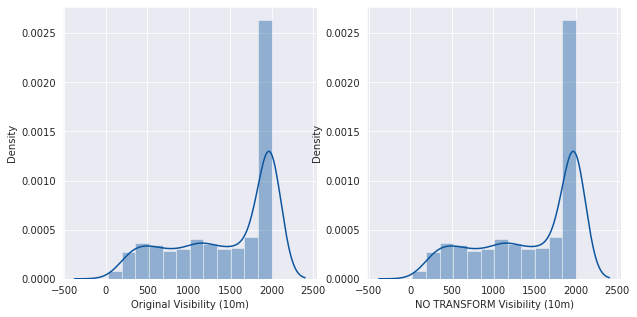

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Dew point temperature(°C)' . Skewness = -0.36


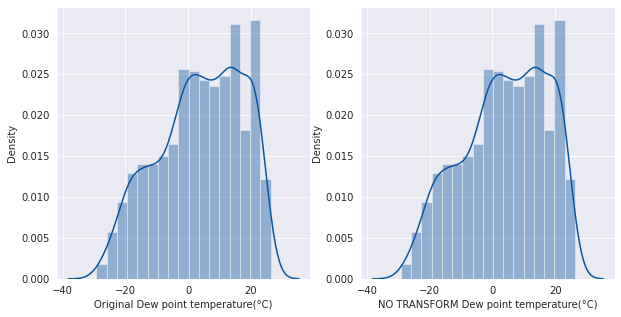

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Solar Radiation (MJ/m2)' had 'positive' skewness of 1.59

 Transformation yielded skewness of 0.25


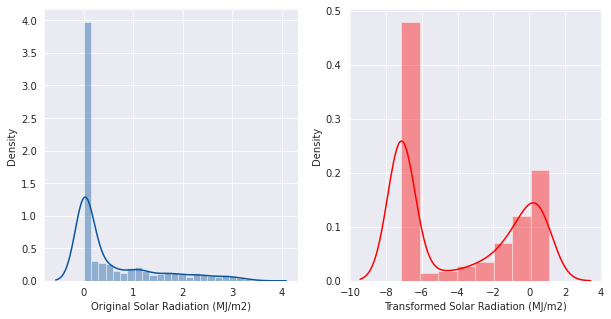

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Rainfall(mm)' had 'positive' skewness of 13.24

 Transformation yielded skewness of 3.80


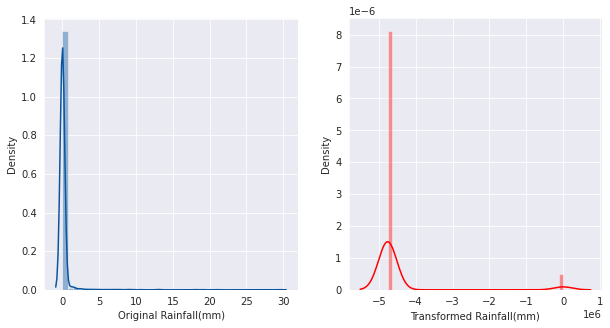

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 ------------------------------------------------------

 'Snowfall (cm)' had 'positive' skewness of 6.94

 Transformation yielded skewness of 4.21


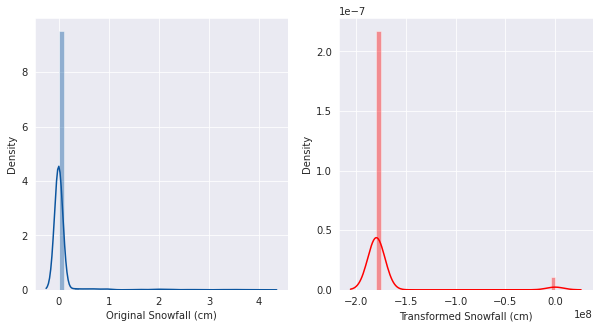

In [26]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np

X_train_transf = skew_autotransform(X_train.iloc[:, 1:10].copy(deep=True), plot = True, exp = False, threshold = 1)
X_test_transf = skew_autotransform(X_test.iloc[:, 1:10].copy(deep=True), plot = True, exp = False, threshold = 1)

In [27]:
print(DataFrame(X_train.iloc[:,0]).join(X_train_transf).join(X_train.iloc[:,10:])['Solar Radiation (MJ/m2)'].head(10))
print(X_train['Solar Radiation (MJ/m2)'].head(10))

8415    0.039099
5049   -0.266851
8395   -6.780319
1535   -6.780319
5518   -6.780319
5064   -6.780319
8089   -6.780319
3653   -6.780319
4414   -6.780319
1222   -6.780319
Name: Solar Radiation (MJ/m2), dtype: float64
8415    1.03
5049    0.76
8395    0.00
1535    0.00
5518    0.00
5064    0.00
8089    0.00
3653    0.00
4414    0.00
1222    0.00
Name: Solar Radiation (MJ/m2), dtype: float64


In [28]:
X_train_df_new = DataFrame(X_train.iloc[:,0]).join(X_train_transf).join(X_train.iloc[:,10:])
X_test_df_new = DataFrame(X_test.iloc[:,0]).join(X_test_transf).join(X_test.iloc[:,10:])
print(X_train_df_new.shape, X_test_df_new.shape)                                                           

(7008, 37) (1752, 37)


In [29]:
X_train_val = X_train_df_new.iloc[:,1:].values
X_test_val = X_test_df_new.iloc[:,1:].values
y_train_val = y_train.values
y_test_val = y_test.values

# Standard Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
stdsc = StandardScaler()  


# X_train_std_df = stdsc.fit_transform(X_train_df_new)
# X_test_std_df = stdsc.transform(X_test_df_new)
X_train_std = stdsc.fit_transform(X_train_val)
X_test_std = stdsc.transform(X_test_val)



           Date  Hour  Temperature(°C)  ...  Month_Nov  Month_Oct  Month_Sep
8415 2018-11-16    15             13.2  ...          1          0          0
5049 2018-06-29     9             22.9  ...          0          0          0
8395 2018-11-15    19             11.2  ...          1          0          0
1535 2018-02-02    23             -2.6  ...          0          0          0
5518 2018-07-18    22             27.2  ...          0          0          0

[5 rows x 37 columns]
[[ 0.50542093  0.02237011  0.13701177 ...  3.36076432 -0.31098813
  -0.29612847]
 [-0.36356579  0.83822207  1.35998213 ... -0.29755136 -0.31098813
  -0.29612847]
 [ 1.08474541 -0.14584679 -0.59677044 ...  3.36076432 -0.31098813
  -0.29612847]
 ...
 [ 0.36058981  1.39333784  0.18593058 ... -0.29755136 -0.31098813
  -0.29612847]
 [ 1.22957653 -1.37383015 -0.35217637 ... -0.29755136 -0.31098813
  -0.29612847]
 [ 1.51923877  0.53543165 -0.15650112 ... -0.29755136 -0.31098813
   3.37691277]]


#*3. Shapley Values*


https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [38]:
#!pip install shap
import pandas as pd
import shap
import sklearn


model = sklearn.linear_model.LinearRegression()
model.fit(X_train_df_new.iloc[:,1:], DataFrame(y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
explainer = shap.Explainer(model.predict, X_train_df_new.iloc[:,1:])
shap_values = explainer(X_train_df_new.iloc[:,1:])

Permutation explainer: 7009it [04:44, 23.67it/s]                          


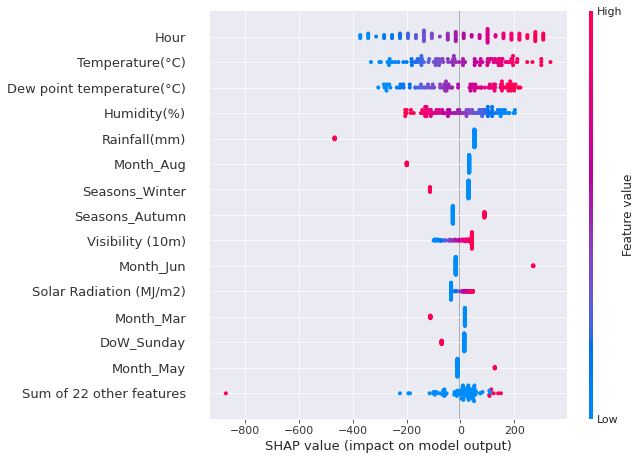

In [62]:
shap.plots.beeswarm(shap_values, max_display=15)

In [ ]:
# Feature importance considerations

from statsmodels.api import OLS
OLS(y_train,X_train.iloc[:,1:]).fit().summary()

# Cross validation for Regression algorithms

best min_samples_leaf: 4  with r2_score =  0.8468693038406389


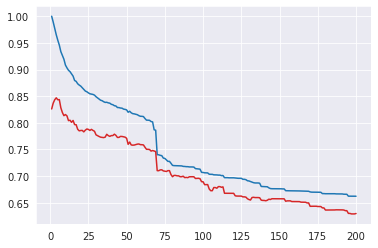

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# lets find the best min_samples_leaf with trial and error
acc_test = [] # accuracy per k (by accuracy i mean r2_score)
acc_train = []
max_r2_test = 0
best_k_test = 0
for k in range(1,201):
    rt = DecisionTreeRegressor(min_samples_leaf = k , random_state = 1)
    rt.fit(X_train_val , y_train_val)
    rt_pred_train = rt.predict(X_train_val)
    rt_pred_test = rt.predict(X_test_val)
    r2_train = metrics.r2_score(y_train_val , rt_pred_train)
    r2_test = metrics.r2_score(y_test_val , rt_pred_test)
    acc_test.append(r2_test)
    acc_train.append(r2_train)
    if r2_test > max_r2_test:
        max_r2_test = r2_test
        best_k_test = k

print("best min_samples_leaf:",best_k_test , " with r2_score = " , max_r2_test)
plt.plot(np.arange(1,201) , acc_train , color = 'tab:blue')
plt.plot(np.arange(1,201) , acc_test , color = 'tab:red')

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.linear_model import Lasso, Ridge


regressors = {"LinearRegression": LinearRegression(),
              "RandomForestRegressor": RandomForestRegressor(random_state = 1),
              "Support Vector Regressor: ": SVR(kernel = 'rbf'),
              "Decision Tree Regressor: ": DecisionTreeRegressor(min_samples_leaf = 4 , random_state = 1),
              "XGBoost Regressor:": XGBRegressor(),
              "LightGBM Regressor:": LGBMRegressor(),
              "Lasso:": Lasso(max_iter = 10000),
              "Ridge:": Ridge()}

for k, v in regressors.items():
  print(k)
  scores_mse = cross_val_score(estimator=v,
                              X=X_train_val,
                              y=y_train_val,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=1)

  scores_r2 = cross_val_score(estimator=v,
                              X=X_train_val,
                              y=y_train_val,
                              cv=5,
                              scoring='r2',
                              n_jobs=1)
  print("mean MSE: ", abs(scores_mse.mean()))
  print("mean R2: ", scores_r2.mean(), "\n")

LinearRegression
mean MSE:  163605.34975144872
mean R2:  0.6060251697672046 

RandomForestRegressor
mean MSE:  33690.95270986174
mean R2:  0.9188898981344693 

Support Vector Regressor: 
mean MSE:  444016.79521502025
mean R2:  -0.0681758126691752 

Decision Tre Regressor: 
mean MSE:  63940.00047413815
mean R2:  0.8462244233255213 

XGBoost Regressor:
[03:49:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:19] W

Ill-conditioned matrix (rcond=7.98891e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.92238e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.50083e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.96154e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.59744e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.98891e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.92238e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.50083e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.96154e-19): result may not be accurate.
Ill-conditioned matrix (rcond=7.59744e-19): result may not be accurate.
